In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.cell.code_cell.rendered{width:98%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:14pt;}
div.CodeMirror-scroll { overflow-x: auto; }
div.text_cell_render.rendered_html{font-size:14pt;}
div.text_cell_render ul li, code{font-size:22pt; line-height:14px;}
div.output {font-size:14pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:14pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:14pt;padding:5px;}
table.dataframe{font-size:14px;}
</style>
"""))

<font size="5" color="red"><b>ch2. 군집분석</b></font>
# 1절. 군집모델(클러스터링)
- 클러스터(cluster) : 독립변수의 특성이 유사한 데이터의 그룹
- 클러스터링(clustering) : 주어진 데이터를 여러 개의 클러스터로 구분하는 것 

1) 중심 기반 클러스터링(K-Means) : https://commons.wikimedia.org/wiki/File:KMeans-Gaussian-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e5/KMeans-Gaussian-data.svg" 
     style="display: block; margin-left: 0; width: 20%;">

2) 연결기반 클러스터링(DBSCAN) : https://commons.wikimedia.org/wiki/File:DBSCAN-density-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/0/05/DBSCAN-density-data.svg" 
     width="300" 
     style="display: block; margin-left: 0; width: 20%;">

3) 밀도기반 클러스터링(DBSCAN의 변형으로 OPTICS) : https://commons.wikimedia.org/wiki/File:OPTICS-Gaussian-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/8/8a/OPTICS-Gaussian-data.svg" 
     width="300" 
     style="display: block; margin-left: 0; width: 20%;">

# 2절 K-Means 클러스터링
- 가장 단순하고 빠른 클러스터링 알고리즘
- 중심점을 찾아가는 알고리즘
- 세부 알고리즘 교안 6page

In [4]:
# 분류를 위한 가상의 데이터 생성
from sklearn.datasets import make_classification
X, y= make_classification(n_samples=20,    # 데이터갯수 default=100
                          n_features=2,    # 독립변수 개수(default=20)
                          n_informative=2, # 타겟변수에 영향을 미치는 독립변수 갯수
                          n_redundant=0,   # 타겟변수에 영향을 미치지 않는 독립변수 갯수
                          n_clusters_per_class=1, # 각 타겟변수 그룹별 서브그룹이 없음
                          n_classes=2,     # 타겟변수의 그룹수
                          random_state=123
                         )
import numpy as np
print(X.shape, y.shape)
np.c_[X,y][:3]

(20, 2) (20,)


array([[ 1.03859554,  2.51175389,  0.        ],
       [ 1.00271366,  1.93521549,  0.        ],
       [-1.6881048 ,  0.02599427,  1.        ]])

<function matplotlib.pyplot.show(close=None, block=None)>

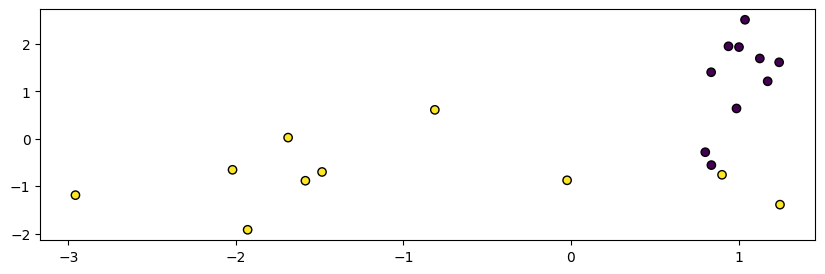

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.scatter(x=X[:, 0], y=X[:,1], c=y, edgecolors='k')   # 실제값
plt.show

In [10]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2,   # 군의 갯수
               init='k-means++', # 초기 중심점을 서로 멀리 초기화. random(초기중심점 랜덤)
               n_init=10,      # 각 다른 초기값으로 10번 실행해 보고 가장 좋은 모델 선택
               max_iter=300    # 각 실행에서 300번 미만으로 중심점을 옮김
              )
model.fit(X)

KMeans(n_clusters=2, n_init=10)

In [18]:
centers = model.cluster_centers_   # 각 그룹의 중심점
print('model.labels :', model.labels_)
pred = model.predict(X)
print('   예측값    :',pred)    # 예측값이 수치가 아니고 어느 그룹으로 그루핑되엇는지
print('   실제값    :',y)

model.labels : [0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0]
   예측값    : [0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0]
   실제값    : [0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0]


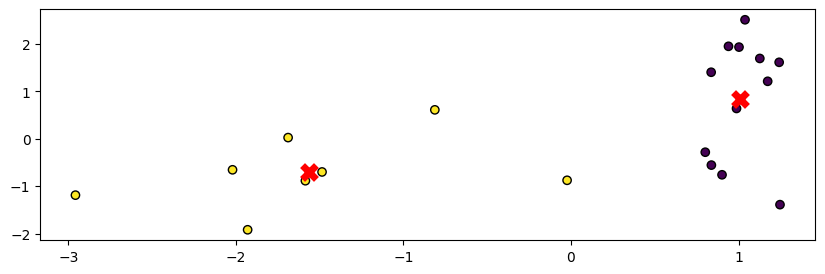

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.scatter(x=X[:, 0], y=X[:,1], c=pred, edgecolors='k')   # 예측값
plt.scatter(x=centers[:, 0], y=centers[:,1], c='r', marker='x', s=100, lw=5)
plt.show()

## cf Normalizer(스케일러) 적용

In [23]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
Xnor = scaler.fit_transform(X)
np.c_[X, Xnor][:3]

array([[ 1.03859554,  2.51175389,  0.3821159 ,  0.92411441],
       [ 1.00271366,  1.93521549,  0.46005267,  0.88789162],
       [-1.6881048 ,  0.02599427, -0.99988146,  0.01539667]])

In [24]:
model = KMeans(n_clusters=2,
               init='random',
               n_init='auto',  # init가 k-means++이면 1, init가 random이면 10
               max_iter=300
              )
model.fit(Xnor)

KMeans(init='random', n_clusters=2, n_init='auto')

In [28]:
# 0그룹으로 분류된 Xnor
Xnor[model.labels_==0, 0]  # x축
Xnor[model.labels_==0, 1]  # y축

array([ 0.01539667, -0.99964925, -0.70515067,  0.60128094, -0.42571159,
       -0.37289833, -0.48721942, -0.30784666])

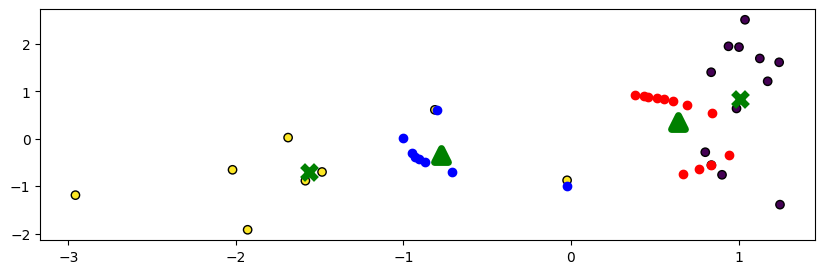

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.scatter(x=X[:, 0], y=X[:,1], c=pred, edgecolors='k')   # 예측값
plt.scatter(x=centers[:, 0], y=centers[:,1], c='g', marker='x', s=100, lw=5)
plt.scatter(x=Xnor[model.labels_==0, 0] ,
            y=Xnor[model.labels_==0, 1] , c='b')
plt.scatter(x=Xnor[model.labels_==1, 0] ,
            y=Xnor[model.labels_==1, 1] , c='r')
plt.scatter(x=model.cluster_centers_[:,0] ,
            y=model.cluster_centers_[:,1] , c='g', marker='^', s=100, lw=5)
plt.show()

In [33]:
model.cluster_centers_

array([[-0.77398837, -0.33522479],
       [ 0.64128684,  0.34902823]])

## K-Means 클러스터링의 한계점(13p)
- 군의 특성이 다를 경우
    * 군의 크기가 다른 경우
    * 군의 밀도가 다른 경우
    * 군이 구형이 아닌 경우
- 이상치를 포함할 경우 : 이상치를 조정하거나 삭제한 후 클러스터링
### - 군의 크기가 다른 경우

In [36]:
np.random.seed(0)
# group0 : 평균 -10, 표준편차 2인 10행 2열 배열
group0 = np.random.normal(loc=-10, scale=2, size=(10,2))
y = np.full(len(group0), 0)
group0 = np.c_[group0, y]
group0[:3]

array([[ -6.47189531,  -9.19968558,   0.        ],
       [ -8.04252403,  -5.5182136 ,   0.        ],
       [ -6.26488402, -11.95455576,   0.        ]])

In [38]:
# group1 : 평균 10, 표준편차 2인 10행 2열 배열
group1 = np.random.normal(loc=10, scale=2, size=(10,2))
y = np.full(len(group1), 1)
group1 = np.c_[group1, y]
group1[:3]

array([[ 7.90289407,  7.15996413,  1.        ],
       [ 6.58745962, 13.90155079,  1.        ],
       [ 8.98069564,  9.1238514 ,  1.        ]])

In [40]:
# group2 : 평균 0, 표준편차 5인 100행 2열 배열
group2 = np.random.normal(loc=0, scale=5, size=(100,2))
y = np.full(len(group2),2)
group2 =  np.c_[group2, y]
group2[:3]

array([[-5.94429629, -2.53408177,  2.        ],
       [-2.98157019, -0.26283648,  2.        ],
       [-9.68139903,  0.94389298,  2.        ]])

In [41]:
data = np.r_[group0, group1, group2]
data[::10], data.shape

(array([[-6.47189531, -9.19968558,  0.        ],
        [ 7.90289407,  7.15996413,  1.        ],
        [-5.94429629, -2.53408177,  2.        ],
        [-0.55270329,  5.10086356,  2.        ],
        [-6.53263426,  8.2906534 ,  2.        ],
        [-3.59802194, -4.06496494,  2.        ],
        [ 5.342547  , -2.26692902,  2.        ],
        [ 3.49228575,  0.01885445,  2.        ],
        [-8.4905291 ,  1.93640238,  2.        ],
        [-2.99326968, -5.57948493,  2.        ],
        [ 4.64752556,  2.91112296,  2.        ],
        [-1.97614491, -5.79710258,  2.        ]]),
 (120, 3))

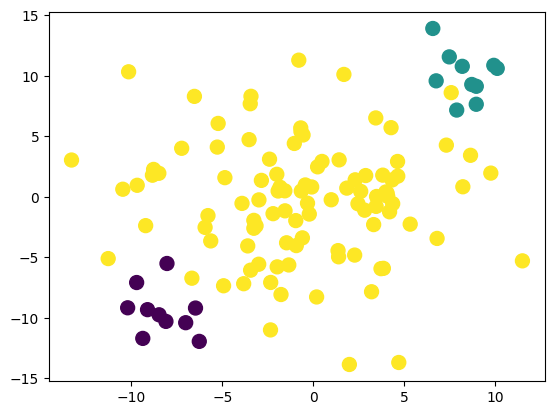

In [43]:
plt.scatter(x=data[:,0], y=data[:,1], c=data[:,2], s=100)

In [44]:
model = KMeans(n_clusters=3, init='k-means++', n_init='auto')
model.fit(data[:, :2])

KMeans(n_clusters=3, n_init='auto')

In [45]:
centers = model.cluster_centers_ # 중심점
centers

array([[ 4.60350819,  7.82624966],
       [-6.50961805, -3.7393136 ],
       [ 1.56333096, -1.32373416]])

In [46]:
pred = model.predict(data[:, :2])  # 예측값
print(pred)
pred = model.labels_  # 모델이 클러스터링한 결과
print(pred)

[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 0 1 2 1 0 0 2 1 0 1 2
 0 2 2 0 2 2 1 2 0 1 2 2 2 1 2 1 0 2 2 2 1 1 0 2 1 2 2 2 1 2 1 1 2 2 2 2 2
 2 2 2 2 2 2 1 1 2 1 2 2 1 2 0 0 1 2 1 2 2 1 2 0 2 0 0 1 2 2 2 1 2 1 2 2 1
 2 2 2 1 1 2 0 1 2]
[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 0 1 2 1 0 0 2 1 0 1 2
 0 2 2 0 2 2 1 2 0 1 2 2 2 1 2 1 0 2 2 2 1 1 0 2 1 2 2 2 1 2 1 1 2 2 2 2 2
 2 2 2 2 2 2 1 1 2 1 2 2 1 2 0 0 1 2 1 2 2 1 2 0 2 0 0 1 2 2 2 1 2 1 2 2 1
 2 2 2 1 1 2 0 1 2]


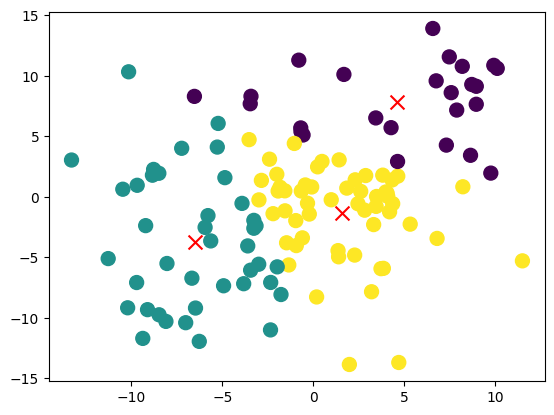

In [62]:
plt.scatter(x=data[:,0], y=data[:,1], c=pred, s=100)
plt.scatter(x=centers[:,0], y=centers[:,1], c='r', s=100, marker='x')

In [64]:
# 위의 단점을 보완하고자 6개 그룹으로 clustering
model = KMeans(n_clusters=6, n_init=10) # init='k-means++' 는 기본값
model.fit(data[:, :2])

KMeans(n_clusters=6, n_init=10)

In [65]:
centers = model.cluster_centers_
pred = model.labels_
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       3, 4, 1, 5, 4, 1, 4, 3, 1, 3, 1, 3, 0, 1, 4, 1, 1, 1, 3, 5, 4, 2,
       4, 1, 2, 1, 1, 1, 5, 5, 1, 0, 3, 5, 5, 3, 3, 3, 4, 5, 1, 1, 4, 5,
       4, 1, 2, 1, 4, 4, 1, 1, 5, 5, 4, 1, 5, 1, 3, 2, 5, 2, 4, 4, 5, 5,
       0, 4, 5, 4, 3, 4, 5, 3, 1, 4, 4, 0, 4, 3, 1, 5, 1, 5, 4, 1, 4, 4,
       5, 1, 4, 5, 1, 3, 4, 0, 5, 1])

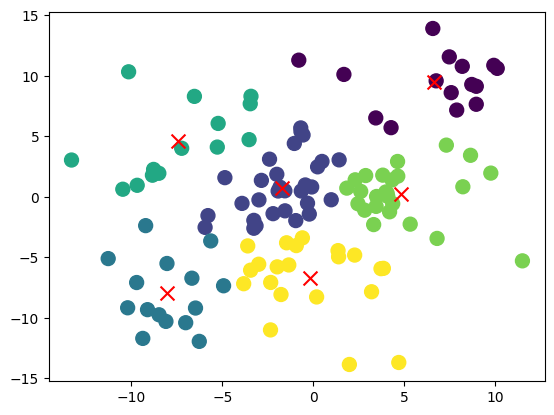

In [66]:
plt.scatter(x=data[:,0], y=data[:,1], c=pred, s=100)
plt.scatter(x=centers[:,0], y=centers[:,1], c='r', s=100, marker='x')

In [69]:
data[pred==0, 0]  # 0번 그룹의 x축 데이터

array([ 7.90289407,  6.58745962,  8.98069564,  7.49440928,  6.7722043 ,
        8.20906688,  8.97838972,  9.94363554, 10.13303444,  8.73135581,
        3.44909082, -0.78833508,  4.28961962,  7.5999743 ,  1.69452063])

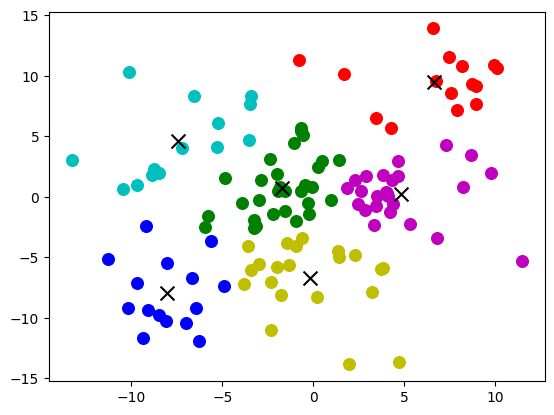

In [71]:
colors = ['r','g','b','c','m','y'] 
for i in range(len(colors)):
    plt.scatter(x = data[pred==i, 0],
                y = data[pred==i, 1], c=colors[i], s=70)
plt.scatter(x=centers[:,0], y=centers[:,1], c='k', s=100, marker='x')

# 3절 Hierarchical 클러스터링(계층적 군집분석)

- 계층적 분석(linkage) -> dendrogram -> fcluster를 이용해서 클러스터를 생성

    * 군끼리 묶으면서 최종적으로는 하나의 군집이 될 때까지 군을 묶는 클러스터링 알고리즘
    * 군집의 수를 미리 정해주지 않아도 됨
    * Dendrogram을 이용하여 다양한 군집 수 시각화

In [78]:
from seaborn import load_dataset
iris = load_dataset('iris')
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
90,5.5,2.6,4.4,1.2,versicolor
139,6.9,3.1,5.4,2.1,virginica
124,6.7,3.3,5.7,2.1,virginica
97,6.2,2.9,4.3,1.3,versicolor
9,4.9,3.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
77,6.7,3.0,5.0,1.7,versicolor
83,6.0,2.7,5.1,1.6,versicolor
98,5.1,2.5,3.0,1.1,versicolor
1,4.9,3.0,1.4,0.2,setosa


In [79]:
# 계층적 군집결과와 맞추기 위한 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['species'] = le.fit_transform(iris.species)
iris.loc[::50]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
50,7.0,3.2,4.7,1.4,1
100,6.3,3.3,6.0,2.5,2


In [81]:
from scipy.cluster.hierarchy import linkage
# method="single" : 가장 가까운 거리를 사용
# method="complete" : 가장 먼 거리를 사용
cluster_model = linkage(iris, method="complete")  
cluster_model.shape

(149, 4)

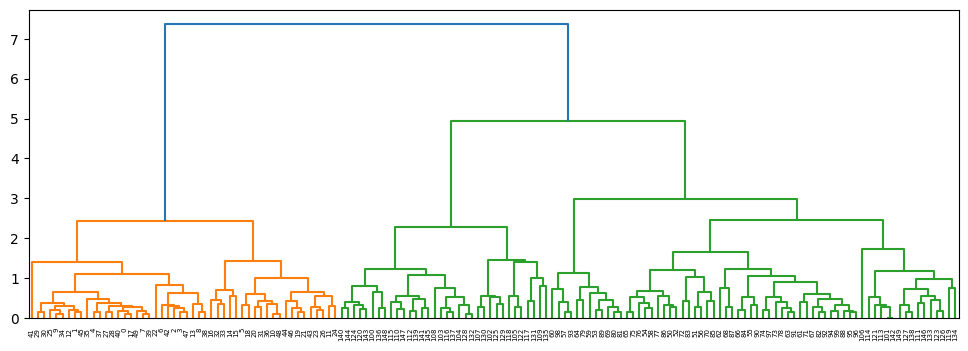

In [90]:
# dendrogram
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
dendrogram(cluster_model, labels=iris.index)
# 파일로 저장
plt.savefig('data/ch02_dendrogram.png',dpi=300, bbox_inches='tight')
plt.show()

In [92]:
# 클러스터링
from scipy.cluster.hierarchy import fcluster
fcluster(cluster_model,      # linkage()로 만든 클러스터링 결과
         t=6,   # 클러스터를 나누는 임계값(threshold)
         criterion='distance')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [93]:
pred = fcluster(cluster_model, 4, criterion='distance')
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [94]:
# pred에서 1->0, 3->1, 2->2 로 변경
import numpy as np
np.choose([3,3,2,1,2], [0,10,20,30])  # np.choose(인덱스, 값)

array([30, 30, 20, 10, 20])

In [99]:
# pred에서 1->0, 3->1, 2->2 로 변경
adjusted_pred = np.choose(pred,[999,0,2,1])  # 조정된 예측치(실제값:iris.species)
import pandas as pd
pd.crosstab(iris.species, adjusted_pred, rownames=['실제'], colnames=['예측'],
           margins=True)   # 행과 열의 총계 추가

예측,0,1,2,All
실제,,,,
0,50,0,0,50
1,0,50,0,50
2,0,16,34,50
All,50,66,34,150


In [103]:
original_name = le.inverse_transform(iris.species)
pred_name = le.inverse_transform(adjusted_pred)
pd.crosstab(original_name, pred_name)

col_0,setosa,versicolor,virginica
row_0,,,
setosa,50,0,0
versicolor,0,50,0
virginica,0,16,34


<Axes: xlabel='petal_length', ylabel='petal_width'>

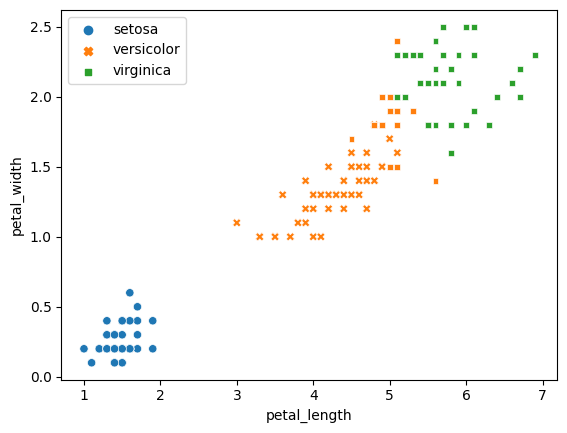

In [106]:
import seaborn as sns
sns.scatterplot(data=iris,
               x='petal_length', y='petal_width',
               hue=pred_name,
               style=original_name)

# 4절 DBSCAN 클러스터링
- 연결 기반(밀도 기반) 군집화 알고리즘. 이상치를 자동 감지
- 단점 : 클러스터의 밀도가 일정하지 않으면 성능이 낮아짐

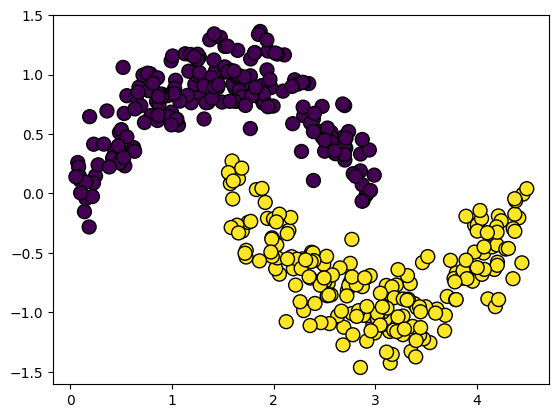

In [128]:
X1 = np.random.rand(200)*3  # 0<= rand(데이터 갯수)*3 < 3  ==> 균등분포
noise = np.random.normal(0,0.2,X1.shape)
Y1 = np.sin(X1)+noise
#plt.scatter(x=X1, y=Y1)
group1 = np.c_[X1, Y1, np.full(len(X1),0)]
#print(group1[:3])

X2 = X1 + 1.5
noise = np.random.normal(0,0.2,X1.shape)
Y2 = np.cos(X2)+noise
#plt.scatter(x=X2, y=Y2)
group2 = np.c_[X2, Y2, np.full(len(X2),1)]
#print(group2[:3])

data = np.r_[group1, group2]
#data[::40]
plt.scatter(x=data[:, 0],
            y=data[:, 1], c=data[:,2], s=100, edgecolors='k')
plt.show()

In [130]:
# KMeans : 거리 기반 클러스터링
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, init='random', n_init=10)
model.fit(data[:, :2])
pred = model.predict(data[:,:2])
pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

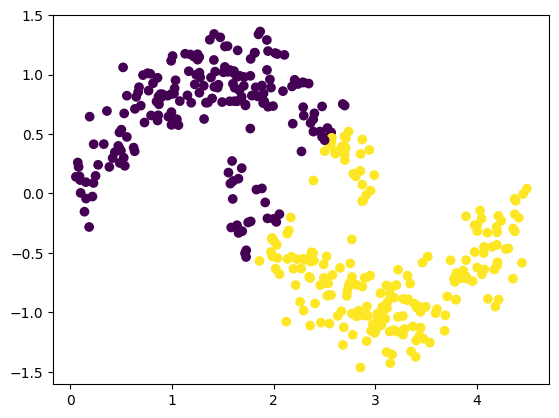

In [132]:
plt.scatter(x=data[:, 0], y=data[:,1],c=pred)

In [134]:
# 밀도 기반 DBSCAN
from sklearn.cluster import DBSCAN
# 반경(epsilon)이 0.3이내의 최소10개 데이터씩 군집화
db_model = DBSCAN(eps=0.3, min_samples=10)
db_model.fit(data[:, :2])

DBSCAN(eps=0.3, min_samples=10)

In [148]:
label = db_model.labels_  # -1: 이상치-자동감지됨
# 0그룹으로 분류된 data
#data[label==-1]
#set(label)
n_noise = list(label).count(-1)
n_cluster = len(set(label)) -(1 if -1 in label else 0)
print('이상치 갯수 : ',n_noise, ', 예측된 클러스터 갯수: ', n_cluster)

이상치 갯수 :  1 , 예측된 클러스터 갯수:  2


In [150]:
# 0으로 분류된 data
data[label==0][:3]

array([[1.35424724, 0.76452471, 0.        ],
       [1.61853734, 0.88855126, 0.        ],
       [0.55796889, 0.82214967, 0.        ]])

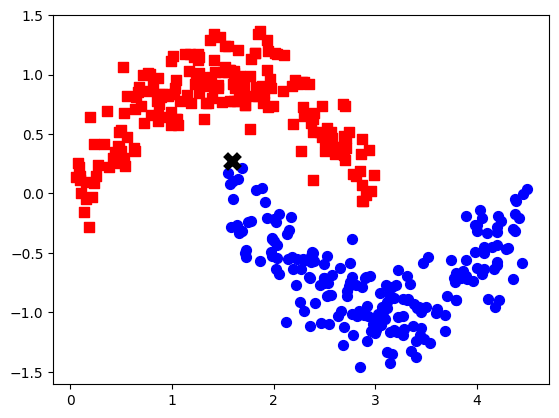

In [154]:
colors = ['r','b']
markers = ['s','o']
for i in range(n_cluster):
    plt.scatter(x = data[label==i, 0],
                y = data[label==i, 1], s=50, c=colors[i], marker=markers[i])
plt.scatter(x=data[label==-1,0],
            y=data[label==-1,1], s=100, c='k', marker='x', lw=5)


# 5절. 군집모형의 성능평가
- score 함수를 통해 예측 모형 평가(분류, 회귀에서 쓰고 군집에서는 안씀)
- metrics 모듈의 함수를 통해 군집 모형 평가(클러스터 소속과 갯수를 모두 알고 있을 때)
- 실루엣 계수(클러스터 소속과 갯수를 모를 때)
## 5.1 metrics함수 이용

In [155]:
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
148,6.2,3.4,5.4,2.3,2


In [156]:
iris_X = iris.iloc[:, :-1]
iris_y = iris.iloc[:, -1]
iris_X.shape, iris_y.shape

((150, 4), (150,))

In [160]:
# 3개 그룹으로 군집화
iris_model3 = KMeans(n_clusters=3, random_state=1, n_init=10)
iris_model3.fit(iris_X)
pred = iris_model3.labels_
print(pred)
pred = iris_model3.predict(iris_X)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [163]:
# pred 조정(1->0, 0->1, 2->2)  np.choose(인덱스들, 값들)
# np.choose([1,1,0,0,2,2],[1,0,2])
pred3 = np.choose(pred,[1,0,2])  # 3개 그룹으로 군집화한 결과

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [165]:
# 3개 그룹으로 군집화한 자료
print('실제값 :', iris_y[::50])
print('예측값 :', pred3[::50])

실제값 : 0      0
50     1
100    2
Name: species, dtype: int32
예측값 : [0 1 2]


In [168]:
# 2개 그룹으로 군집화
iris_model2 = KMeans(n_clusters=2, n_init=10, random_state=1)
iris_model2.fit(iris_X)
pred2 = iris_model2.labels_

In [170]:
# 2개 그룹으로 군집화한 자료
iris_y2 = np.array([0]*50 + [1]*100)
print('실제값 :', iris_y2)
print('예측값 :', pred2)

실제값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
예측값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


### 조정된 rand 지수

In [171]:
# 3개 그룹
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(labels_true=iris_y,  #실제값
                    labels_pred=pred3)   #예측값

0.7302382722834697

In [172]:
# 2개 그룹 평가
adjusted_rand_score(labels_true=iris_y2,  #실제값
                    labels_pred=pred2)   #예측값

0.920405050901892

### 상호의존도를 나타내는 지표
- 두 군집간 정보 공유 정도

In [178]:
species_name = le.inverse_transform(iris_y)  # 실제값 원형
pred_name = le.inverse_transform(pred3)   # 예측값(이름)

In [180]:
# 3그룹 평가
from sklearn.metrics import mutual_info_score
print(mutual_info_score(iris.species, pred3))
print(mutual_info_score(species_name, pred_name))
print(mutual_info_score(species_name, pred3))  # 타입이 달라도 평가 가능

0.8255910976103356
0.8255910976103356
0.8255910976103356


In [181]:
# 2그룹 평가
mutual_info_score(iris_y2, pred2)

0.5596576064224734

### 그 외 클러스터링 성능평가 기준들

In [182]:
from sklearn.metrics import homogeneity_score  
print('3그룹 :', homogeneity_score(iris.species, pred3))
print('3그룹 :', homogeneity_score(species_name, pred_name))
print('2그룹 :', homogeneity_score(iris_y2, pred2))

3그룹 : 0.7514854021988338
3그룹 : 0.7514854021988338
2그룹 : 0.8792539652679946


In [183]:
from sklearn.metrics import completeness_score  # 정답과 가깝게 만들어졌냐?
print('3그룹 :', completeness_score(iris.species, pred3))
print('3그룹 :', completeness_score(species_name, pred_name))
print('2그룹 :', completeness_score(iris_y2, pred2))

3그룹 : 0.7649861514489815
3그룹 : 0.7649861514489815
2그룹 : 0.861693475999054


In [184]:
# homogeneity_score와 completeness_score의 조화 평균
from sklearn.metrics import v_measure_score
print('3그룹 :', v_measure_score(iris.species, pred3))
print('3그룹 :', v_measure_score(species_name, pred_name))
print('2그룹 :', v_measure_score(iris_y2, pred2))

3그룹 : 0.7581756800057784
3그룹 : 0.7581756800057784
2그룹 : 0.870385156563164


## 5.2 실루엣 계수

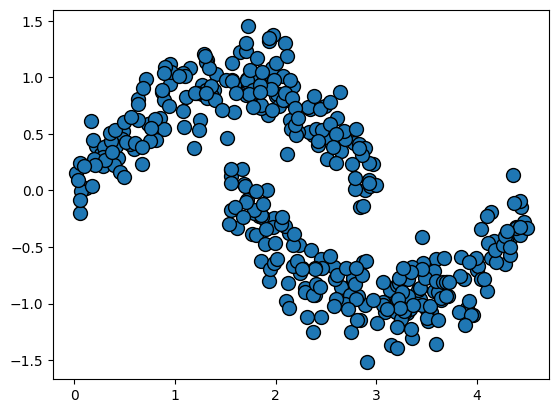

In [209]:
np.random.seed(0)
X1 = np.random.rand(200)*3  # 0<= rand(데이터 갯수)*3 < 3  ==> 균등분포
noise = np.random.normal(0,0.2,X1.shape)
Y1 = np.sin(X1)+noise
#plt.scatter(x=X1, y=Y1)
group1 = np.c_[X1, Y1, np.full(len(X1),0)]

X2 = X1 + 1.5
noise = np.random.normal(0,0.2,X1.shape)
Y2 = np.cos(X2)+noise
#plt.scatter(x=X2, y=Y2)
group2 = np.c_[X2, Y2, np.full(len(X2),1)]

data = np.r_[group1, group2]
plt.scatter(x=data[:, 0],
            y=data[:, 1], s=100, edgecolors='k')
plt.show()

In [210]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_cluster in range_n_clusters:
    model = KMeans(n_clusters=n_cluster,
                   n_init=10,
                   #random_state=2
                  )
    model.fit(data[:, :-1])
    score = silhouette_score(X=data[:, :-1], labels=model.labels_)
    print("클러스터 수 : {}, 실루엣 계수:{}" .format(n_cluster,score))
#  실루엣 계수가 가장 높은 7개로 클러스터링을 할 예정

클러스터 수 : 2, 실루엣 계수:0.5319154905481303
클러스터 수 : 3, 실루엣 계수:0.4675310928682518
클러스터 수 : 4, 실루엣 계수:0.47531670307119467
클러스터 수 : 5, 실루엣 계수:0.49065908101876077
클러스터 수 : 6, 실루엣 계수:0.48460246070278856
클러스터 수 : 7, 실루엣 계수:0.5079889111161713
클러스터 수 : 8, 실루엣 계수:0.4959234083493174
클러스터 수 : 9, 실루엣 계수:0.4647915900838182
클러스터 수 : 10, 실루엣 계수:0.4555639719445547


In [212]:
model = KMeans(n_clusters=7, init='random', n_init=10)
model.fit(data[:, :-1])
pred = model.labels_
pred = model.predict(data[:, :-1])

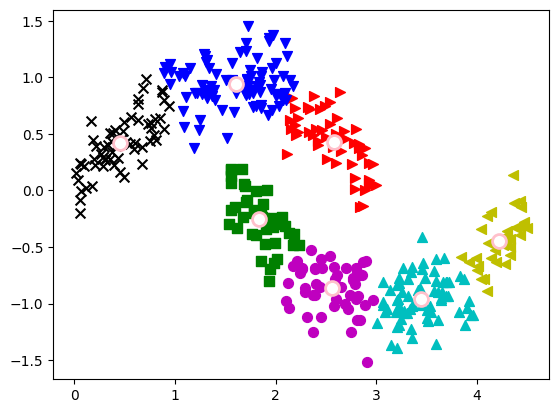

In [218]:
centers = model.cluster_centers_
colors  = ['r','g','b','c','m','y','k']  # 0,2,6 (k,b,r)=>0 / 1,3,4,5=>1
markers = ['>','s','v','^','o','<','x']
# 0클러스터로 분류된 데이터
data[pred==6]
for i, c in enumerate(centers):
    #print(i, c)
    plt.scatter(x=data[pred==i,0],
                y=data[pred==i,1], s=50, c=colors[i], marker=markers[i])
    plt.scatter(x=c[0], y=c[1], s=100, c='w', edgecolors='pink', lw=2)

# 6절 연습문제
- iris 데이터의 petal_length열과 petal_width열을 이용해서 K-Means 알고리즘으로 군집분석하고 그래프로 시각화하세요.
- (단, 각 클러스터의 중심점이 함께 표시되고 군의 수는 2로 설정)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [4]:
# 1. Iris 데이터 로드
iris = load_iris()

In [5]:
# petal_length, petal_width만 선택
X = iris.data[:, 2:4]  # [petal_length, petal_width]

In [7]:
# 2. K-Means 군집 분석 (k=2)
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X)

In [8]:
# 클러스터 중심점
centers = kmeans.cluster_centers_

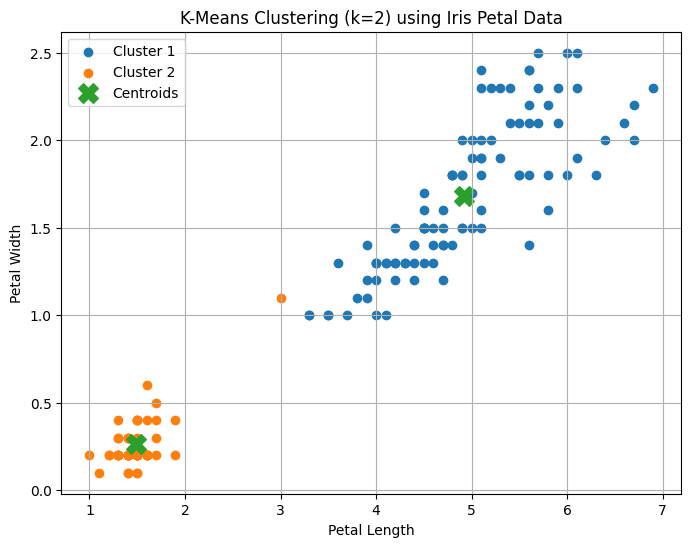

In [13]:
# 3. 시각화
plt.figure(figsize=(8, 6))
# 각 클러스터 산점도
plt.scatter(X[labels == 0, 0], X[labels == 0, 1],
            label='Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1],
            label='Cluster 2')
# 중심점 표시
plt.scatter(centers[:, 0], centers[:, 1],
            marker='X', s=200,
            label='Centroids')

# 그래프 설정
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('K-Means Clustering (k=2) using Iris Petal Data')
plt.legend()
plt.grid(True)
plt.show()